In [1]:
import pandas as pd
import datetime as datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("./train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


datetime column의 데이터는 모델이 학습할 때, 지원하지 않는 자료형일 수도 있으니, 년/월/일/시간/분/초로 나누어 int타입으로 저장하자.

In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


나눈 데이터는 시간 데이터이기 때문에, 균일하게 잘 나누어졌는지 시각화하여 확인해보자.

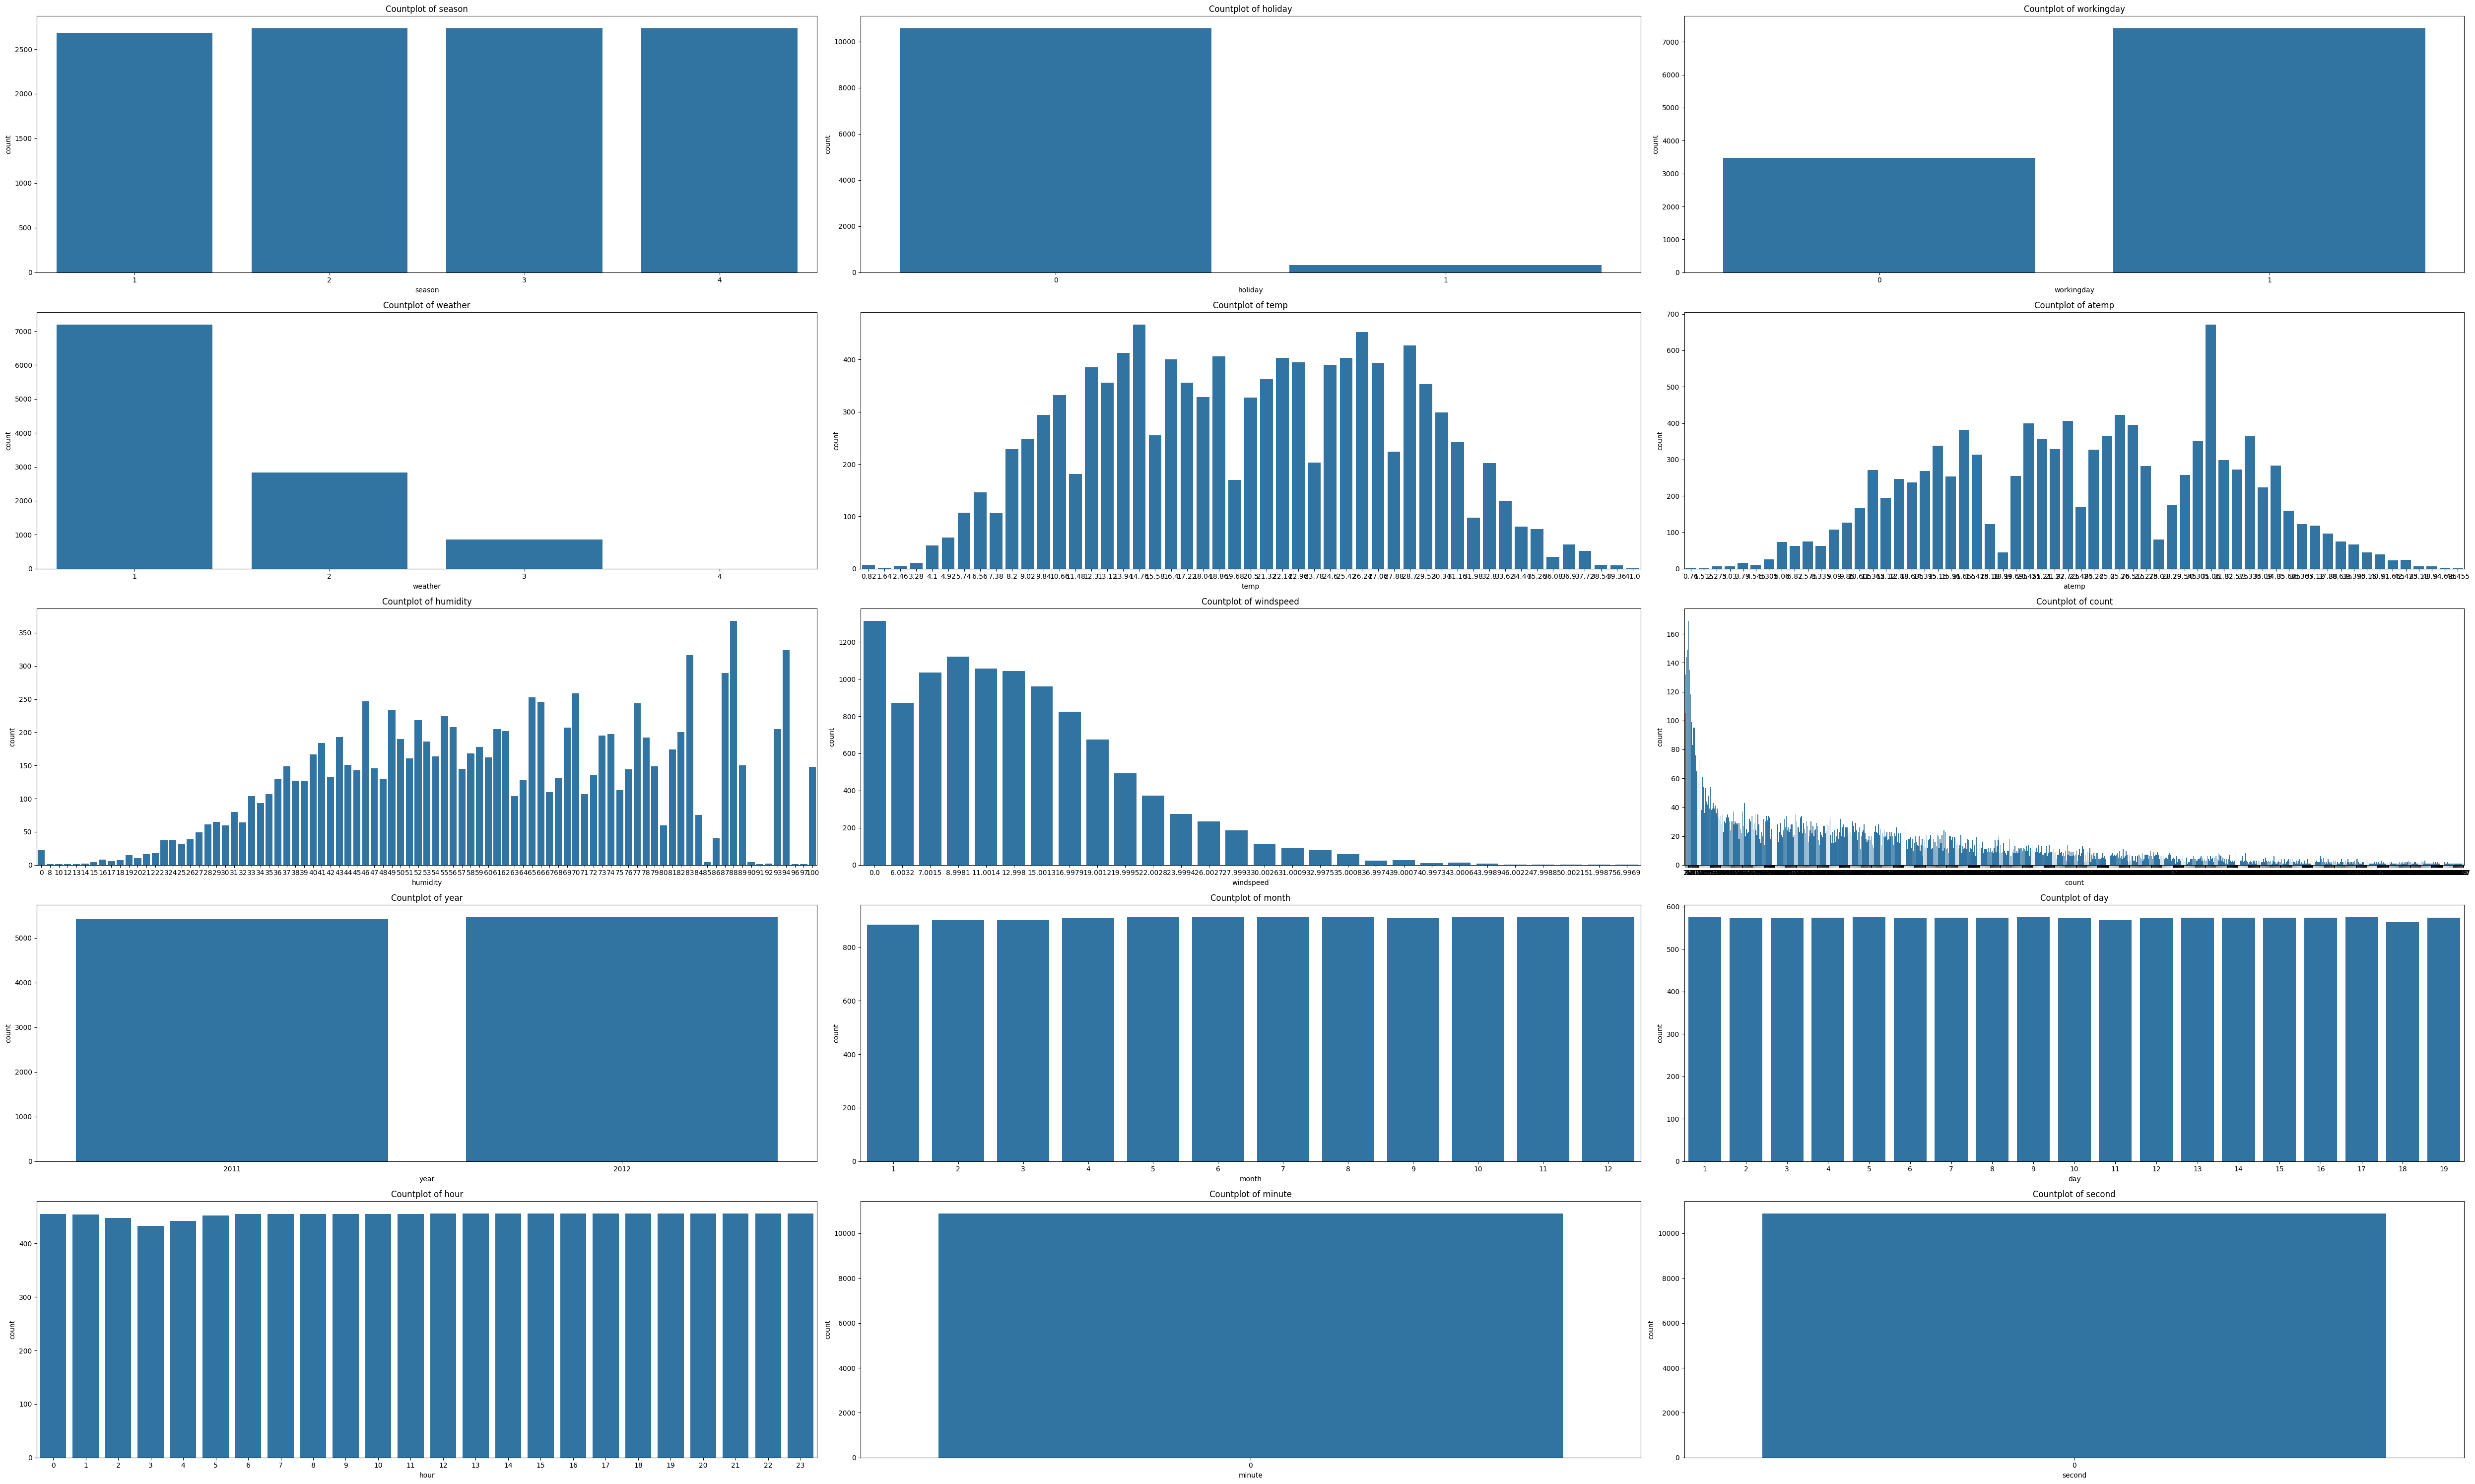

In [4]:
fig, axs = plt.subplots(5, 3, figsize=(50, 30))
cols = ["season","holiday","workingday","weather","temp","atemp",
        "humidity","windspeed","count","year",
        "month","day","hour","minute","second"]

for ax, col in zip(axs.flatten(), cols):
    sns.countplot(data=train, x=col, ax=ax)
    ax.set_title(f"Countplot of {col}")

plt.tight_layout()
plt.show()

hour 컬럼에서 오전 2시~5시 사이에 데이터가 다른 시간대에 비해 부족해보이지만, 거의 차이가 없으니 괜찮을 것 같다.

season, holiday, workingday, weather는 범주형 같음 -> 원핫인코딩 진행

In [5]:
train2 = pd.get_dummies(train, columns=["season", "weather", "workingday", "holiday"], drop_first=True)
train2.columns

Index(['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count', 'year', 'month', 'day', 'hour', 'minute',
       'second', 'season_2', 'season_3', 'season_4', 'weather_2', 'weather_3',
       'weather_4', 'workingday_1', 'holiday_1'],
      dtype='object')

In [6]:
# casual, registered 컬럼은 rental여부에 따른 사람들의 수를 나타내므로 빼기
features = ['temp', 'atemp', 'humidity', 'windspeed', 
            'count', 'season_2', 'season_3', 'season_4', 'weather_2', 
       'weather_3', 'weather_4', 'workingday_1', 'holiday_1']
X = train2[features]
y = train2["count"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 2.018516123597343e-26
RMSE: 1.4207449185541163e-13


시각화하여 확인해보자. 

<Axes: xlabel='count', ylabel='count'>

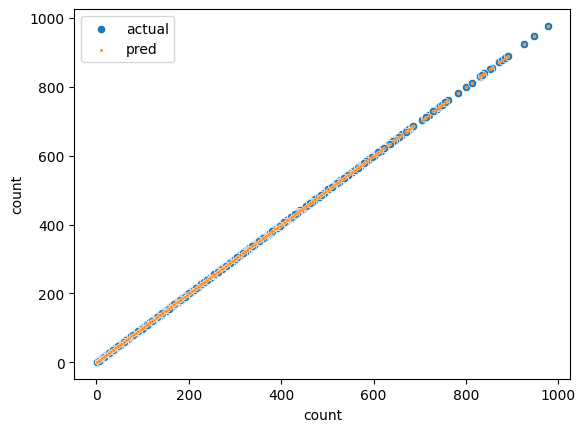

In [ ]:
# 같은 x값에 대하여 y값 비교(y_test, y_pred)
sns.scatterplot(x=y_test, y=y_test, label="actual")
sns.scatterplot(x=y_test, y=y_pred, s=5, label="pred")

y_pred와 y_test 값의 차이가 거의 없음을 알 수 있다.